<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/Introduccion/5_Poo_Experimento/poo-experimento.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Aplicación de POO: Experimento de Tiempo de Reacción

En esta clase vamos a utilizar un diseño de POO para crear una batería de experimentos:

- Tiempo de Reacción
- Cuestionario

Para eso, tendremos una clase Sujeto que contendrá un id de sujeto, una clase abstracta **Experimento** de la cual heredarán las de **Tiempo de Reacción** y **Cuestionario**, y una clase para generar un **Reporte** de los resultados automáticamente.

In [1]:
!pip install python-docx

Empezamos creando una clase para definir el *sujeto* del experimento.

In [74]:
class Sujeto():
    '''Clase para un Sujeto experimental.
    info contiene datos por ejemplo sociodemográficos previos
    en resultados guardaremos los resultados de las pruebas'''
    def __init__(self, sujeto_id, info: dict):
        self.id = sujeto_id
        self.info = info
        self.resultados = dict()
        
    def __repr__(self):
        # Funcion mágica para mostrar los datos del sujeto
        # el :<20 hace un relleno de máximo 20 espacios
        s = f'Datos de ID {self.id:<20}\n\n'
        for k, v in self.info.items():
            s += f"{k:<20} {v:<20}\n"
        for k, v in self.resultados.items():
            s += f"{k:<20} {v:<20}\n"
        return s

Veamos como funciona nuestra clase.

In [75]:
# Instanciamos
info = {'edad':22, 'fecha_nacimiento':'01-01-1998', 'años_educacion':6}
sujeto = Sujeto('123456789', info)

In [76]:
print(sujeto)

Datos de ID 123456789           

edad                 22                  
fecha_nacimiento     01-01-1998          
años_educacion       6                   



Una vez que ya contamos con sujeto. Definimos una clase para la realización del experimento.  

La clase tendrá tres métodos:
>- instruccion: dará una pauta sobre como realizar el experimento.
>- corregir_datos: toma los datos crudos y calcula un resultado
>- tomar_experimento: realizará el experimento.

In [77]:
class Experimento():
    def __init__(self, sujeto: Sujeto, consigna='atencion!', nombre='Experimento'):
        self.nombre = nombre
        self.sujeto = sujeto
        self.consigna = consigna
        self.datos = []
        
    def instruccion(self):
        print(self.consigna)
    
    def corregir_datos(self):
        pass
    
    def tomar_experimento(self):
        pass

In [78]:
exp = Experimento(sujeto)

In [79]:
exp.nombre

'Experimento'

### Tiempo de Reacción

Para tomar el experimento se utilizarán dos modulos/librerias: **time** y **random**. 

>- **time**, nos va a ayudar a calcular el tiempo durante nuestro experimento.  
>- **random**, nos va a permitir generar números aleatorios.

### Ejercicio: 

Crear una función *tomar_experimento* que ejecute una prueba de tiempo de reacción. Para esto, recibe como argumento "rango_pausa", que es el rango de segundos máximo que puede demorar entre un estímulo y el siguiente.

Usando:

- La función **time.time()** para devolver el tiempo actual en segundos
- La función **random.random()** para generar un número aleatorio entre 0 y 1 y variar el tiempo de pausa
- La función **time.sleep(s)** para hacer una pausa de *s* segundos
- Y la función **input()** que aguarda una entrada del usuario, bloqueando la ejecución hasta que ingresa la tecla *ENTER*. 

Pista en pseudocódigo:

```Dada una lista vacía 
Dado un entero "n_trials"

Hacer "n_trials" veces:
  Tomar un tiempo 0
  Aguardar input
  Tomar un tiempo 1
  Calcular diferencia entre tiempos
  Agregar diferencia a la lista
  Hacer una pausa random de tiempo
```

In [80]:
import time
import random

In [81]:
def tomar_experimento(n_trials, rango_pausa=10):
    pass

In [82]:
class TiempoDeReaccion(Experimento): 
    '''Hereda la clase Experimento'''
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def corregir_datos(self):
        mu = sum(self.datos) / len(self.datos)
        var = sum([(x - mu)**2 for x in self.datos]) / len(self.datos)
        self.sujeto.resultados['MediaReaccion'] = mu
        self.sujeto.resultados['VarianzaReaccion'] = var

    # COMPLETAR
    # Usar la función tomar_experimento, esta vez con self en los argumentos
    # y guardar el resultado en self.datos
    # Al final del experimento, llamar a la función "corregir_datos"
    def tomar_experimento(self, n_trials, rango_pausa=10):
        pass

### Utilizando nuestra clase


In [41]:
# Generar un str random como ID
import random


'9422781775311632'

In [83]:
# Instanciar Sujeto


In [84]:
# Instanciar TiempoDeReaccion


In [ ]:
# Llamar metodo tomar_experimento


¿Que datos contiene?

In [86]:
# Llamamos un atributo


[0.6562693119049072,
 3.1354660987854004,
 0.6210577487945557,
 2.6110854148864746,
 0.8488471508026123]

Datos de ID 9422781775311632    

edad                 32                  
fecha_nacimiento     01-01-1998          
años_educacion       6                   
MediaReaccion        1.57454514503479    
VarianzaReaccion     1.1579792508427773  

### Cuestionario

Generamos un cuestionario de ejemplo. Cada pregunta debe estar separada en un renglón (es decir por un caracter de *newline*, generalmente '\n')

In [88]:
with open('cuestionario.txt', 'w') as out:
    out.write(
'''1. Me siento calmado.
2. Me siento seguro.
3. Estoy tenso.
4. Estoy contrariado.
5. Me siento a gusto.''')

In [89]:
class Cuestionario(Experimento):
    '''Otro caso de prueba que hereda de experimento. Esta vez la inicialización
    incluye cargar las preguntas en el atributo self.preguntas'''
    def __init__(self, path_cuestionario, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.cargar_preguntas(path_cuestionario)
        
    def cargar_preguntas(self, path):
        # COMPLETAR
        # Función que lee el txt y guarda cada renglón en self.preguntas
        
        
    def corregir_datos(self):
        self.sujeto.resultados[f'Total{self.nombre}'] = sum(self.datos)
        
    def tomar_experimento(self):
        # COMPLETAR
        # Dar la instruccion
        # Tomar cada pregunta con input()
        # Convertir la entrada a entero
        # Guardar la respuesta en self.datos
        # Al finalizar, ejecutar corregir_datos
        
        
        # Extra: agregar un chequeo de respuesta correcta y que sea int

Usamos la clase anterior para tomar el cuestionario

In [90]:
consigna = '''Aparecerán abajo algunas expresiones que las personas usan para describirse. 
Lea cada frase y presione el número que indique cómo se siente ahora mismo, siendo 
0 = NO, 1 = POCO, 2 = BASTANTE, 3 = MUCHO. 
'''

stai = Cuestionario('cuestionario.txt', sujeto, consigna = consigna, nombre='Cuestionario')

In [ ]:
# Tomar el experimento


In [92]:
sujeto

Datos de ID 9422781775311632    

edad                 32                  
fecha_nacimiento     01-01-1998          
años_educacion       6                   
MediaReaccion        1.57454514503479    
VarianzaReaccion     1.1579792508427773  
TotalCuestionario    11                  

### Generando Reporte

Una vez realizado el ejercicio vamos a generar una clase para realizar el reporte del experimento.

La clase Reporte va a generar un documento que contendrá: 
- Un método para analizar los datos resultado del experimento;
- Un método para crear gráficos a partir de los resultados.
- Un método para para generar el informe final

Para los gráficos vamos a usar matplotlib, que tiene métodos como "plot" donde recibe listas de números y genera un objeto "Figura". En este tema de visualización se ahonda en el curso de Análisis de Datos.
La función **sns.set()** simplemente aplica un estilo.

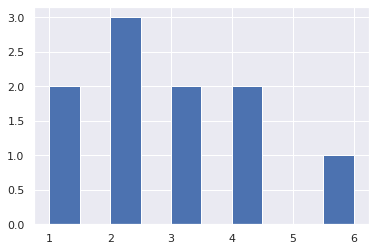

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Pequeño ejemplo de matplotlib
plt.hist([1,2,3,6,4,1,2,3,2,4]);

In [111]:
from docx import Document
from docx.shared import Cm        

In [112]:
class Reporte():
    '''Esta clase va a generar un reporte para un Sujeto a partir de un Experimento'''
    def __init__(self, sujeto: Sujeto, experimento: Experimento, img_path = 'tmp.png'):
        self.suj = sujeto
        self.exp = experimento
        self.img_path = img_path
    
    def crear_graficos(self):
        '''Genera un gráfico de lineas y un histograma para 
        los datos de los experimentos'''
        fig, ax = plt.subplots(1,2, figsize=(11,4))
        ax[0].plot(self.exp.datos)
        ax[0].set_ylabel('Error (ms)')
        ax[0].set_xlabel('Trials')
        sns.distplot(self.exp.datos, ax=ax[1])
        ax[1].set_ylabel('Frequencia')
        ax[1].set_xlabel('Error (ms)')
        return ax
        
    def generar_reporte(self):
        '''Función que genera un documento de Word en base a los datos
        de Sujeto y Experimento. Ver más en: 
        
        https://python-docx.readthedocs.io/en/latest/
        '''
        # Instanciamos un Documento
        documento = Document()
        
        # Agregamos un Titulo
        documento.add_heading(f'Informe de Resultados', 0)
        # Info del sujeto
        p = documento.add_paragraph(f'Sujeto ID: ')
        p.add_run(f'{self.suj.id}').bold = True
        
        # Agregamos una lista de items iterando
        # el diccionario de info del Sujeto
        for k, v in self.suj.info.items():
            documento.add_paragraph(f'{k}= {v}',
                                   style='List Bullet')
        
        # Agregamos resultados, hay distintos estilos disponibles
        p = documento.add_paragraph(f'Resultados de {self.exp.nombre}', 
                                   style='Intense Quote')
                
        # COMPLETAR
        # iterar los resultados en self.suj.resultados
        # agregando otra lista de items 

        
        
        
        # Agregamos los gráficos
        ax = self.crear_graficos()
        plt.savefig(self.img_path) # usamos esta ruta provisorialmente
        plt.close() # para no mostrar el plot y solo guardarlo
        documento.add_picture(self.img_path, width=Cm(14)) 

        # Guardamos el archivo docx 
        fp = f'reporte_{self.suj.id}.docx'
        documento.save(fp)
        return fp

In [113]:
# Instanciamos
rep = Reporte(sujeto, tr)

In [114]:
# Generar reporte
fp = rep.generar_reporte()

In [ ]:
# Para descargar el doc en Colab
from google.colab import files

files.download(fp)